<a href="https://colab.research.google.com/github/EvgeniaViskovatykh/Stylometric_Analysis/blob/main/Stylometric_Analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ****Stylometric Analysis of a Novel****

In [ ]:
!pip install textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.1 MB/s eta 0:00:00


In [ ]:
import nltk
import requests
import string
import textstat

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag

from string import punctuation

nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

from collections import Counter

import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### ***David Copperfield*** by Charles Dickens (1850)

In [ ]:
# Download the text from gutenberg

url = "https://www.gutenberg.org/cache/epub/766/pg766.txt"
response = requests.get(url)
lines = response.text.split('\n')

# Exclude lines from 1 to 198 and from 38227 till the end of file
lines = lines[198:38227]

In [ ]:
def analyze_text(url):
    # Download the text
    text = response.text

    # Join the lines into a single string
    lines = text.split('\n')
    text = '\n'.join(lines)

    # Remove punctuation
    punctuations_to_exclude = ['“', '”', '‘']
    text_without_punctuation = ''.join(char for char in text if char not in punctuation and char not in punctuations_to_exclude)

    # Tokenize the text
    tokens = word_tokenize(text_without_punctuation)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens_without_stop_words = [token for token in tokens if token.lower() not in stop_words]

    # Part-of-speech tagging
    tagged_tokens = pos_tag(tokens_without_stop_words)

    # Filter out proper nouns (NNP and NNPS tags)
    filtered_tokens = [token for token, tag in tagged_tokens if tag not in ['NNP', 'NNPS']]

    # Count the frequency of each word
    word_freq = Counter(filtered_tokens)

    # Display the most common words and their frequencies
    print("Most common words:")
    for word, freq in word_freq.most_common(20):
        print(f"{word}: {freq}")

# Example usage"
analyze_text(lines)

Most common words:
’: 3421
said: 2942
little: 1057
would: 965
could: 854
one: 844
aunt: 810
upon: 783
know: 771
much: 640
never: 639
time: 629
made: 618
like: 597
old: 592
say: 588
think: 573
went: 549
us: 547
see: 542


In [ ]:
def sentence_length(url):
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)

    # Calculate the length of each sentence
    sentence_lengths = [len(sentence.split()) for sentence in sentences]

    # Compute the average sentence length
    average_sentence_length = sum(sentence_lengths) / len(sentence_lengths)

    # Print the first 25 sentence lengths
    print("Sentence lengths for the first 25 sentences:", '\n')
    print(sentence_lengths[:25], '\n')
    print(f"Average sentence length: {average_sentence_length:.2f} words")

sentence_length(lines)

Sentence lengths for the first 25 sentences: 

[37, 26, 27, 75, 20, 2, 2, 3, 10, 25, 56, 39, 30, 69, 142, 53, 14, 93, 46, 25, 41, 29, 49, 70, 49] 

Average sentence length: 26.53 words


In [ ]:
def calculate_ttr(tokens):
  # Tokenize the text
    tokens = word_tokenize(text)

    # Calculate the type-token ratio (TTR)
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    ttr = num_unique_tokens / num_tokens

    print(f"Type-Token Ratio (TTR): {ttr:.6f}")
calculate_ttr(lines)

Type-Token Ratio (TTR): 0.055537


In [ ]:
def syntactic_patterns(text):

    # Perform part-of-speech tagging
    tagged_tokens = pos_tag(tokens)

    # Count the frequency of each part of speech
    pos_freq = Counter(tag for _, tag in tagged_tokens)

    # Display the frequency of each part of speech
    print("Syntactic patterns (Parts of Speech):")
    for pos, freq in pos_freq.most_common():
        print(f"{pos}: {freq}")

syntactic_patterns(lines)

Syntactic patterns (Parts of Speech):
NN: 17921
IN: 16523
PRP: 13675
DT: 10867
VBD: 10212
NNP: 9206
JJ: 8380
RB: 7208
CC: 5814
VB: 4794
PRP$: 4362
TO: 3437
VBP: 3314
NNS: 3256
VBN: 3038
VBG: 2716
VBZ: 1614
MD: 1543
WRB: 1047
WP: 765
RP: 726
WDT: 713
CD: 603
EX: 354
JJR: 289
PDT: 246
JJS: 233
RBR: 217
RBS: 69
NNPS: 33
WP$: 29
UH: 24
FW: 17
'': 5
POS: 4
$: 1


In [ ]:
def calculate_readability_measures(url):

    # Calculate the Flesch-Kincaid grade level
    flesch_score = textstat.flesch_reading_ease(text)
    flesch_grade_level = textstat.flesch_kincaid_grade(text)

    print(f"Flesch Reading Ease Score: {flesch_score}")
    print(f"Flesch-Kincaid Grade Level: {flesch_grade_level}")

calculate_readability_measures(lines)

Flesch Reading Ease Score: 69.11
Flesch-Kincaid Grade Level: 8.3


In [ ]:
# Stylometric features
stylometric_features_1 = {
    'Word Frequency': {'said': 2942, 'little': 1057, 'would': 965, 'could': 854, 'one': 844,
                       'aunt': 810, 'upon': 783, 'know': 771, 'much': 640, 'never': 639,
                       'time': 629, 'made': 618, 'like': 597, 'old': 592, 'say': 588, 'think': 573,
                       'went': 549, 'us': 547, 'see': 542},
    'Sentence Length': [37, 26, 27, 75, 20, 2, 2, 3, 10, 25, 56, 39, 30, 69, 142, 53, 14, 93, 46, 25, 41, 29, 49, 70, 49],
    'Vocabulary Richness': 0.055537,
    'POS Tags': {'NN': 17921, 'IN': 16523, 'PRP': 13675, 'DT': 10867, 'VBD': 10212,
                 'NNP': 9206, 'JJ': 8380, 'RB': 7208, 'CC': 5814, 'VB': 4794,
                 'PRP$': 4362, 'TO': 3437, 'VBP': 3314, 'NNS': 3256, 'VBN': 3038}
}

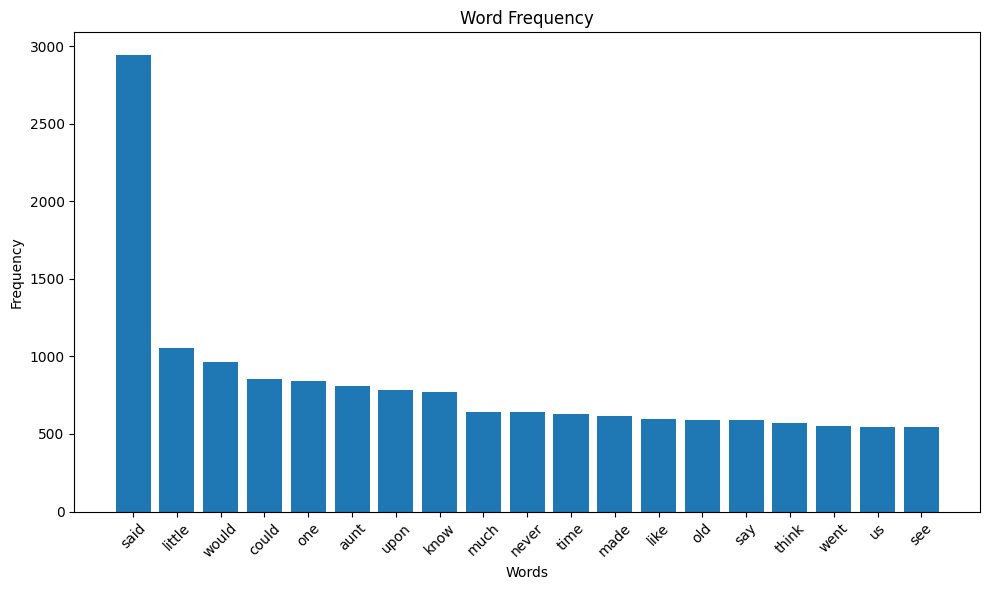

In [ ]:
# Visualize word frequency using a bar plot

word_freq = stylometric_features_1['Word Frequency']
plt.figure(figsize=(10, 6))
plt.bar(word_freq.keys(), word_freq.values())
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

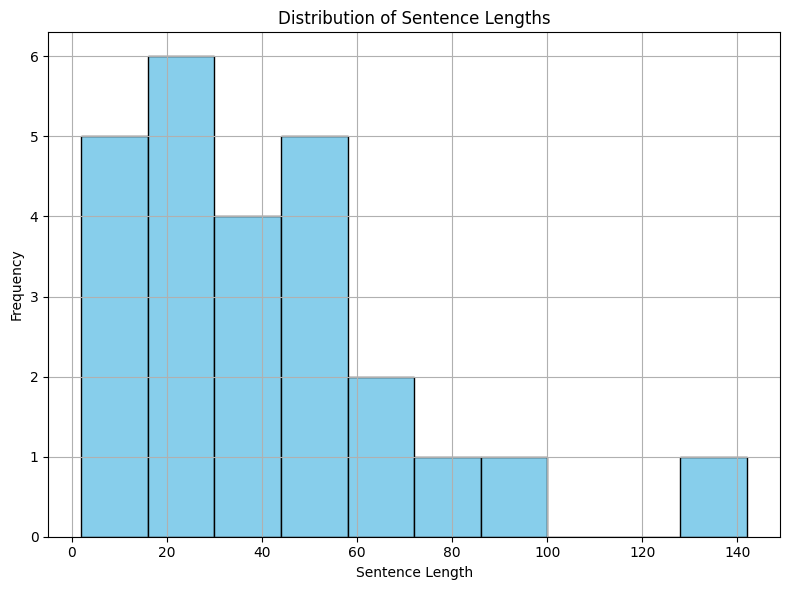

In [ ]:
# Visualize sentence lengths using a histogram
sentence_lengths = stylometric_features_1['Sentence Length']
plt.figure(figsize=(8, 6))
plt.hist(sentence_lengths, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths')
plt.grid(True)
plt.tight_layout()
plt.show()

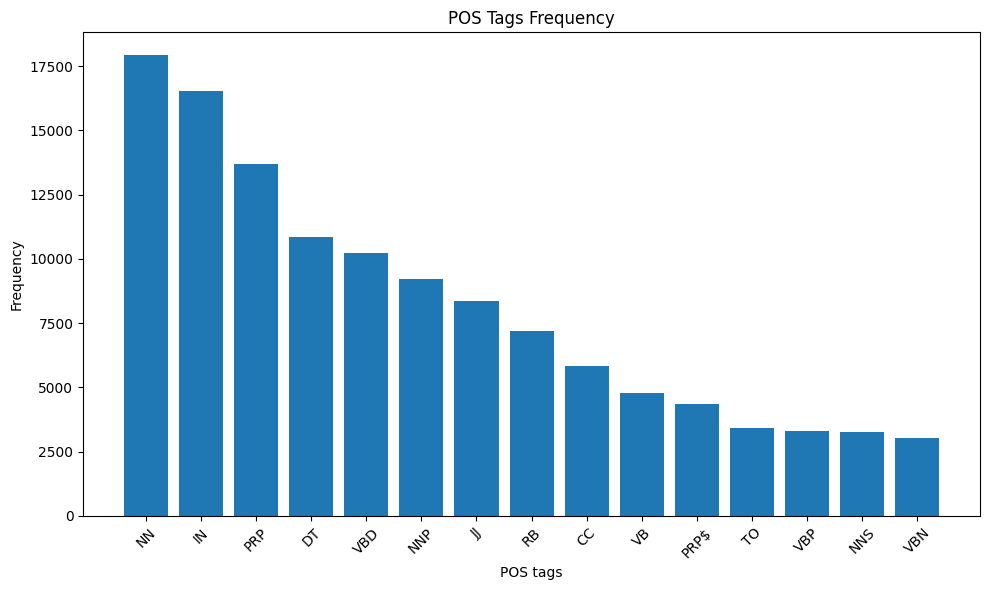

In [ ]:
# Visualize POS tag frequency using a bar plot

pos_tag_freq = stylometric_features_1['POS Tags']
plt.figure(figsize=(10, 6))
plt.bar(pos_tag_freq.keys(), pos_tag_freq.values())
plt.xlabel('POS tags')
plt.ylabel('Frequency')
plt.title('POS Tags Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()